In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix , classification_report ,roc_curve, auc
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix , classification_report ,roc_curve, auc, accuracy_score

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.shape

(11162, 17)

In [5]:
df['deposit'] = df['deposit'].map({'yes' :1 , 'no' : 0})
df['deposit']

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [6]:
list(df.select_dtypes(include='object').columns)

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [7]:
def preprocessor(df):
    res_df=df.copy()
    x=list(df.select_dtypes(include='object').columns)
    for i in x:
        res_df[i]=res_df[i].astype('category')
        res_df[i]=res_df[i].cat.codes
        res_df=pd.get_dummies(res_df,columns=[i],drop_first=True,dtype=int)
    return res_df

In [8]:
encoded_df=preprocessor(df)
encoded_df

,age,balance,day,duration,campaign,pdays,previous,deposit,job_1,job_2,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_1,poutcome_2,poutcome_3
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
x = encoded_df.drop('deposit' , axis = 1)
x.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8',
       'job_9', 'job_10', 'job_11', 'marital_1', 'marital_2', 'education_1',
       'education_2', 'education_3', 'default_1', 'housing_1', 'loan_1',
       'contact_1', 'contact_2', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'poutcome_1', 'poutcome_2', 'poutcome_3'],
      dtype='object')

In [10]:
x = encoded_df.drop('deposit',axis=1).values
y = encoded_df['deposit'].values

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [12]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(x_train,y_train)

y_pred_4 = model_dt_4.predict(x_test)
accuracy_score_4 = accuracy_score(y_test,y_pred_4)
print('Accuracy score for model with depth 4 is', accuracy_score_4)

Accuracy score for model with depth 4 is 0.7720555306762203


In [13]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)
model_dt_6.fit(x_train,y_train)

y_pred_6 = model_dt_6.predict(x_test)
accuracy_score_6 = accuracy_score(y_test,y_pred_6)
print('Accuracy score for model with depth 6 is', accuracy_score_6)

Accuracy score for model with depth 6 is 0.7953425884460367


In [14]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt_8.fit(x_train,y_train)

y_pred_8 = model_dt_8.predict(x_test)
accuracy_score_8 = accuracy_score(y_test,y_pred_8)
print('Accuracy score for model with depth 8 is', accuracy_score_8)

Accuracy score for model with depth 8 is 0.8137035378414689


In [15]:
model_dt_ent = DecisionTreeClassifier(max_depth=4,criterion='entropy')
model_dt_ent.fit(x_train,y_train)

y_pred_ent = model_dt_ent.predict(x_test)
accuracy_score_4 = accuracy_score(y_test,y_pred_6)
print('Accuracy score for model with depth 4 is', accuracy_score_4)

Accuracy score for model with depth 4 is 0.7953425884460367


In [16]:
print(classification_report(y_test, y_pred_8))

              precision    recall  f1-score   support

           0       0.86      0.77      0.82      1187
           1       0.77      0.86      0.81      1046

    accuracy                           0.81      2233
   macro avg       0.82      0.82      0.81      2233
weighted avg       0.82      0.81      0.81      2233



In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

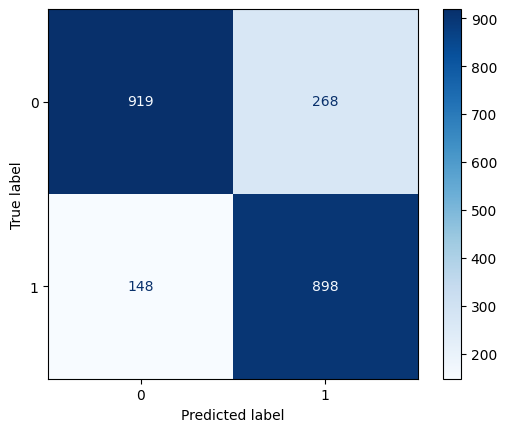

In [18]:
ConfusionMatrixDisplay.from_estimator(model_dt_8,x_test,y_test, cmap=plt.cm.Blues)
plt.show()